# 作業 : (Kaggle)鐵達尼生存預測
https://www.kaggle.com/c/titanic

# [作業目標]
- 試著調整特徵篩選的門檻值, 觀察會有什麼影響效果

# [作業重點]
- 調整相關係數過濾法的篩選門檻, 看看篩選結果的影響 (In[5]~In[8], Out[5]~Out[8])
- 調整L1 嵌入法篩選門檻, 看看篩選結果的影響 (In[9]~In[11], Out[9]~Out[11])

In [1]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

%matplotlib inline

# 忽略警告訊息
import warnings
warnings.filterwarnings('ignore')

data_path = '../data/'
df = pd.read_csv(data_path + 'titanic_train.csv')
train_Y = df['Survived']
df = df.drop(['PassengerId', 'Name'] , axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


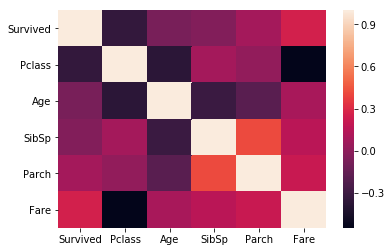

In [2]:
# 計算df整體相關係數, 並繪製成熱圖
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
sns.heatmap(corr)

In [3]:
# 記得刪除 Survived
df = df.drop(['Survived'] , axis=1)

#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
df = df.fillna(-1)
df = df.astype(np.dtype('float64'))
MMEncoder = MinMaxScaler()
df.head()

5 Numeric Features : ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']



,Pclass,Age,SibSp,Parch,Fare
0,3.0,22.0,1.0,0.0,7.2500
1,1.0,38.0,1.0,0.0,71.2833
2,3.0,26.0,0.0,0.0,7.9250
3,1.0,35.0,1.0,0.0,53.1000
4,3.0,35.0,0.0,0.0,8.0500


# 作業1
* 鐵達尼生存率預測中，試著變更兩種以上的相關係數門檻值，觀察預測能力是否提升?

In [4]:
# 原始特徵 + 邏輯斯迴歸
train_X = MMEncoder.fit_transform(df)
estimator = LogisticRegression(solver='lbfgs')
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.7004864906462793

In [5]:
# 篩選相關係數1
high_list = list(corr[(corr['Survived'] > 0.0) | (corr['Survived'] < -0.0)].index)
high_list.pop(0)
print(high_list)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [6]:
# 特徵1 + 邏輯斯迴歸
train_X = MMEncoder.fit_transform(df[high_list])
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.7004864906462793

In [7]:
# 篩選相關係數2
"""
Your Code Here
"""
high_list = list(corr[(corr['Survived'] > 0.1) | (corr['Survived'] < -0.1)].index)
high_list.pop(0)
print(high_list)

['Pclass', 'Fare']


In [8]:
# 特徵2 + 邏輯斯迴歸
train_X = MMEncoder.fit_transform(df[high_list])
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.6791567235397566

Different Correlation Coefficient Threshold + LogisticRegression

CV score = 0.7004864906462793, threshold = +/- 0.00
CV score = 0.7004864906462793, threshold = +/- 0.01
CV score = 0.7004864906462793, threshold = +/- 0.02
CV score = 0.7004864906462793, threshold = +/- 0.03
CV score = 0.7038572771631333, threshold = +/- 0.04
CV score = 0.7038572771631333, threshold = +/- 0.05
CV score = 0.7038572771631333, threshold = +/- 0.06
CV score = 0.7038572771631333, threshold = +/- 0.07
CV score = 0.6847684949253259, threshold = +/- 0.08
CV score = 0.6791567235397566, threshold = +/- 0.09
CV score = 0.6791567235397566, threshold = +/- 0.10
CV score = 0.6791567235397566, threshold = +/- 0.11
CV score = 0.6791567235397566, threshold = +/- 0.12
CV score = 0.6791567235397566, threshold = +/- 0.13
CV score = 0.6791567235397566, threshold = +/- 0.14


Text(0, 0.5, 'Score')

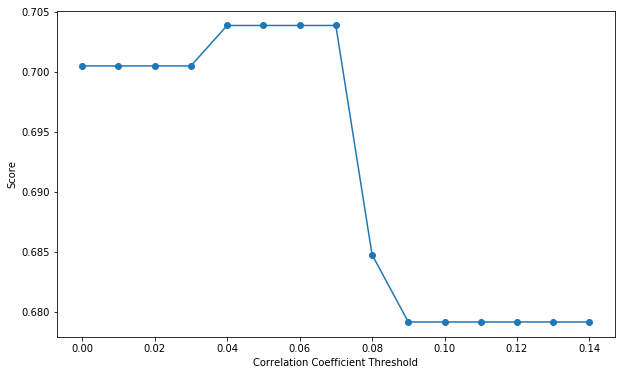

In [9]:
def CorrelationProcess(df_input, corr_threshold_list):
    df = df_input.copy()
    cv_list = []
    threshold_list = []
    high_list = []
    for threshold in corr_threshold_list:
        if threshold < 1:
            high_list = list(corr[(corr['Survived'] > threshold) | (corr['Survived'] < -threshold)].index)
            high_list.pop(0)
            if len(high_list)> 0:
                train_X = MinMaxScaler().fit_transform(df[high_list])
                cv_score = cross_val_score(LogisticRegression(solver='lbfgs'), train_X, train_Y, cv=5).mean()
                cv_list.append(cv_score)
                threshold_list.append(threshold)
                print('CV score = %.16f, threshold = +/- %.2f' % (cv_score, threshold))
    return cv_list, threshold_list

print('Different Correlation Coefficient Threshold + LogisticRegression')
print()
corr_threshold_list = [ i for i in np.arange(0.0, 0.15, 0.01)] 
cv_list, threshold_list = CorrelationProcess(df, corr_threshold_list)

plt.figure(figsize=(10,6))
plt.plot(threshold_list, cv_list, marker='o')
plt.xlabel('Correlation Coefficient Threshold')
plt.ylabel('Score')


# 作業2
* 續上題，使用 L1 Embedding 做特徵選擇(自訂門檻)，觀察預測能力是否提升?

In [10]:
from sklearn.linear_model import Lasso
"""
Your Code Here, select parameter alpha 
"""
L1_Reg = Lasso(alpha=0.003)
train_X = MMEncoder.fit_transform(df)
L1_Reg.fit(train_X, train_Y)
L1_Reg.coef_

array([-0.4116012 , -0.18850803, -0.        ,  0.13666287,  0.01405623])

In [11]:
from itertools import compress
#L1_mask = list((L1_Reg.coef_>0) | (L1_Reg.coef_<0))
#L1_list = list(compress(list(df), list(L1_mask)))
L1_list = list(compress(list(df), list(L1_Reg.coef_)))
L1_list

['Pclass', 'Age', 'Parch', 'Fare']

In [12]:
# L1_Embedding 特徵 + 線性迴歸
train_X = MMEncoder.fit_transform(df[L1_list])
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.7038572771631333

Lasso + LogisticRegression

CV score = 0.7004864906462793, alpha = 0.001
CV score = 0.7004864906462793, alpha = 0.002
CV score = 0.7038572771631333, alpha = 0.003
CV score = 0.6993628951406613, alpha = 0.004
CV score = 0.6993628951406613, alpha = 0.005
CV score = 0.6870410779253894, alpha = 0.006
CV score = 0.6870410779253894, alpha = 0.007
CV score = 0.6870410779253894, alpha = 0.008
CV score = 0.6870410779253894, alpha = 0.009
CV score = 0.6791567235397566, alpha = 0.010
CV score = 0.6791567235397566, alpha = 0.011
CV score = 0.6791567235397566, alpha = 0.012
CV score = 0.6791567235397566, alpha = 0.013
CV score = 0.6791567235397566, alpha = 0.014


Text(0, 0.5, 'Score')

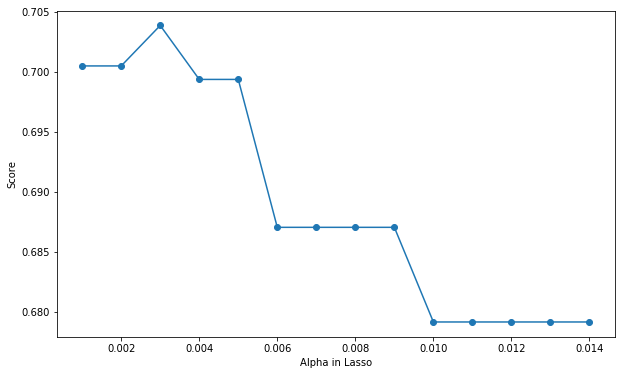

In [13]:
def LassoProcessor(df_input, alpha_list):
    cv_list = []
    df = df_input.copy()
    for alpha in alpha_list:
        L1_Reg = Lasso(alpha = alpha)
        train_X = MinMaxScaler().fit_transform(df)
        L1_Reg.fit(train_X, train_Y)
        L1_list = list(compress(list(df), list(L1_Reg.coef_)))
        train_X = MinMaxScaler().fit_transform(df[L1_list])
        cv_score = cross_val_score(LogisticRegression(solver='lbfgs'), train_X, train_Y, cv=5).mean()
        cv_list.append(cv_score)
        print('CV score = %.16f, alpha = %.3f' % (cv_score, alpha))
    return cv_list
    
print('Lasso + LogisticRegression')
print()
alpha_list = [ i for i in np.arange(0.001, 0.015, 0.001)] 
cv_list = LassoProcessor(df, alpha_list)


plt.figure(figsize=(10,6))
plt.plot(alpha_list, cv_list, marker='o')
plt.xlabel('Alpha in Lasso')
plt.ylabel('Score')
